# Sheet 4
## Author
Maximilian Stablum 

Note: I created the following Sheet together with Tamino Gaub (tamino.gaub@student.uibk.ac.at). The Sheet looks in the most parts identical to him.

## Excersise 1a

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read csv into dataframe
df = pd.read_csv('./Data/it_salary_2020.csv', delimiter=';')
df.sample(5)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
953,30.11.2020 12:55,35.0,Male,Luttich,Data Scientist,12.0,0,Lead,Python,"Python, R, Spark",...,90000.0,375.0,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,240.0
87,24.11.2020 11:46,32.0,Female,Berlin,QA Engineer,10.0,NaN,Senior,Java,"Kotlin, Javascript / Typescript, SQL, Docker",...,NaN,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
308,24.11.2020 16:15,38.0,Male,Berlin,Software Engineer,13.0,6,Lead,Java,Kotlin,...,18000.0,30.0,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,500.0
750,26.11.2020 10:11,40.0,Male,Berlin,Backend Developer,14.0,8,Lead,Spring,"Java / Scala, AWS, Azure, Kubernetes, Docker",...,0.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,No,0.0,0.0
303,24.11.2020 16:02,35.0,Male,Berlin,Software Engineer,10.0,4,Senior,PHP,"SQL, AWS, Docker",...,60000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


Does the total years of experience and yearly brutto salary (without bonus and stocks) in EUR ‘co-vary’? Can you identify whether the years of experience in Germany ‘co- vary’ with the yearly brutto salary (without bonus and stocks) in EUR? Use appropriate calculations and graphical representation for your interpretation.

In [3]:
top_10_salaries = df['Yearly brutto salary (without bonus and stocks) in EUR'].nlargest(10)
print(top_10_salaries)

472    99999999999
852      500000000
972        5417913
777         850000
575         300000
629         250000
803         240000
440         200000
573         200000
965         200000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: int64


In [4]:
# After further inspection, we can see that the two largest values are outliers
df = df.drop(df['Yearly brutto salary (without bonus and stocks) in EUR'].nlargest(2).index)


In [5]:
top_10_salaries = df['Total years of experience'].nlargest(10)
print(top_10_salaries)

1102    383.0
299      75.0
281      65.0
145      55.0
609      45.0
1159     45.0
59       40.0
1164     35.0
1221     35.0
954      31.0
Name: Total years of experience, dtype: float64


In [6]:
# After further inspection, we can see that the largest value is an outlier
df = df.drop(df['Total years of experience'].nlargest(1).index)

In [7]:
cov_years_salary = df['Total years of experience'].cov(df['Yearly brutto salary (without bonus and stocks) in EUR'])
corr_years_salary = df['Total years of experience'].corr(df['Yearly brutto salary (without bonus and stocks) in EUR'])

print(f'Covariance between years of experience and salary: {cov_years_salary}')
print(f'Correlation between years of experience and salary: {corr_years_salary}')

Covariance between years of experience and salary: 24844.016898529437
Correlation between years of experience and salary: 0.025403960103990736


In [8]:
df['Years of experience in Germany'] = pd.to_numeric(df['Years of experience in Germany'].str.replace(',', '.'), errors='coerce')

cov_total_experience_salary = df['Total years of experience'].cov(df['Yearly brutto salary (without bonus and stocks) in EUR'])
cov_germany_experience_salary = df['Years of experience in Germany'].cov(df['Yearly brutto salary (without bonus and stocks) in EUR'])

print("Covariance (Total years of experience, Yearly brutto salary):", cov_total_experience_salary)
print("Covariance (Years of experience in Germany, Yearly brutto salary):", cov_germany_experience_salary)

Covariance (Total years of experience, Yearly brutto salary): 24844.016898529437
Covariance (Years of experience in Germany, Yearly brutto salary): 772.639952786462


<Figure size 700x600 with 0 Axes>

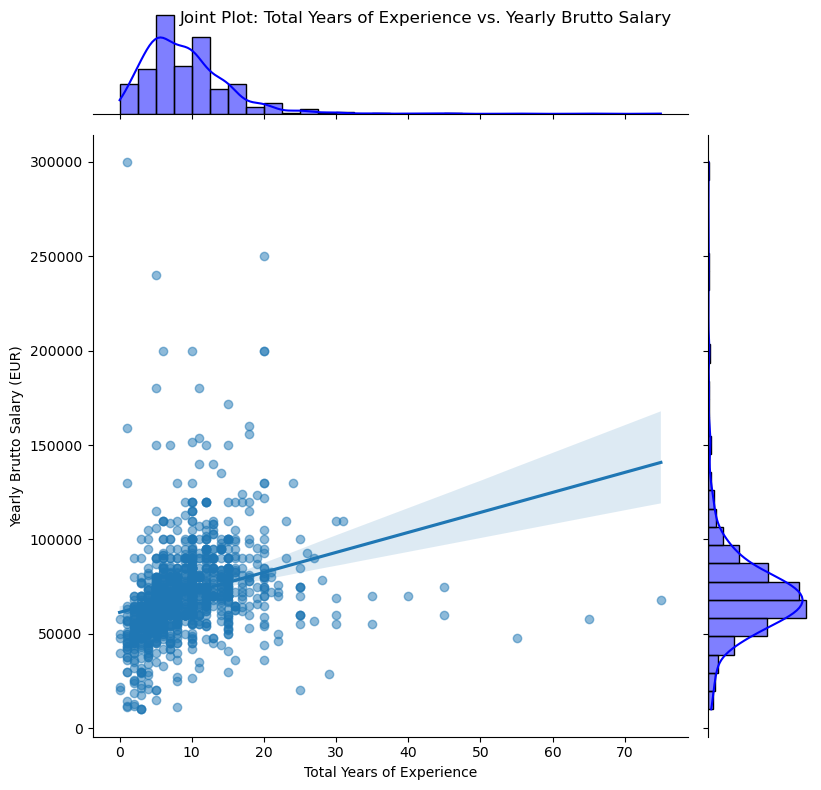

In [9]:
# For better visibility of the chart we exclude values above 300K
salary_threshold = 300000  # Adjust this threshold based on data distribution

# Filter the DataFrame to include only rows where the salary is below the threshold
df_filtered = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] <= salary_threshold]

# Joint Plot 1: Total years of experience vs. Yearly brutto salary (filtered)
plt.figure(figsize=(7, 6))
sns.jointplot(
    data=df_filtered,
    x='Total years of experience',
    y='Yearly brutto salary (without bonus and stocks) in EUR',
    kind='reg', # Regression plot
    height=8,
    marginal_kws=dict(bins=30, fill=True, color='blue'), # Histograms
    scatter_kws={'alpha':0.5}
).set_axis_labels('Total Years of Experience', 'Yearly Brutto Salary (EUR)')
plt.suptitle('Joint Plot: Total Years of Experience vs. Yearly Brutto Salary')

plt.show()

In [10]:
columns_of_interest = ['Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Number of vacation days']

# Calculate the covariance matrix
cov_matrix = df[columns_of_interest].cov().round(2)

# Display the covariance matrix
print("Covariance Matrix:")
cov_matrix

Covariance Matrix:


,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
Total years of experience,39.33,2.484402e+04,2.81
Yearly brutto salary (without bonus and stocks) in EUR,24844.02,2.396223e+10,23984.13
Number of vacation days,2.81,2.398413e+04,214.22


## 2b
Use the Pearson correlation coefficient to measure the correlation for the total years of
experience and the yearly brutto salary (without bonus and stocks) in EUR.

In [11]:
# Calculate the Pearson correlation coefficient
# calculate the pearson correlation coefficient
pearson_corr = df['Total years of experience'].corr(df['Yearly brutto salary (without bonus and stocks) in EUR'])

# Display the result
print("Pearson Correlation Coefficient (Total years of experience vs. Yearly brutto salary):", pearson_corr.round(4))


Pearson Correlation Coefficient (Total years of experience vs. Yearly brutto salary): 0.0254


Graphically illustrate the correlation of the total years of experience and the yearly brutto salary (without bonus and stocks) in EUR.

/var/folders/vd/bb2y2m3x70q9tythmbcl1kkc0000gn/T/ipykernel_20799/1118449727.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


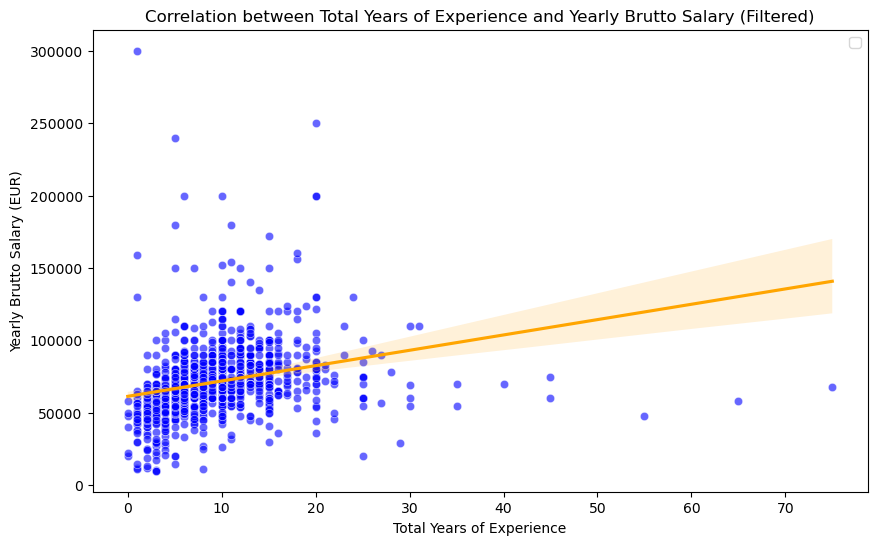

In [12]:
# For better visibility of the chart we exclude values above 300K
df_filtered = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] <= 300000]

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(
    data=df_filtered, 
    x='Total years of experience', 
    y='Yearly brutto salary (without bonus and stocks) in EUR', 
    color='blue', 
    alpha=0.6
)
sns.regplot(
    data=df_filtered, 
    x='Total years of experience', 
    y='Yearly brutto salary (without bonus and stocks) in EUR', 
    scatter=False, 
    color='orange', 
    line_kws={'label': 'Regression Line'}
)

# Adding title and labels
plt.title('Correlation between Total Years of Experience and Yearly Brutto Salary (Filtered)')
plt.xlabel('Total Years of Experience')
plt.ylabel('Yearly Brutto Salary (EUR)')
plt.legend()

# Show plot
plt.show()

## 1c

Graphical representation methods identify whether a quantitative variable depends on a cat- egorical variable. Thus use graphical representation methods to answer the following three questions:
- Does the correlation for the years of experience and the yearly brutto salary (without bonus and stocks) in EUR depend on the position?
- What is the mean of total years of experience per seniority level?
- Does the amount of outliers regarding the yearly brutto salary (without bonus and stocks) in EUR vary within seniority level?

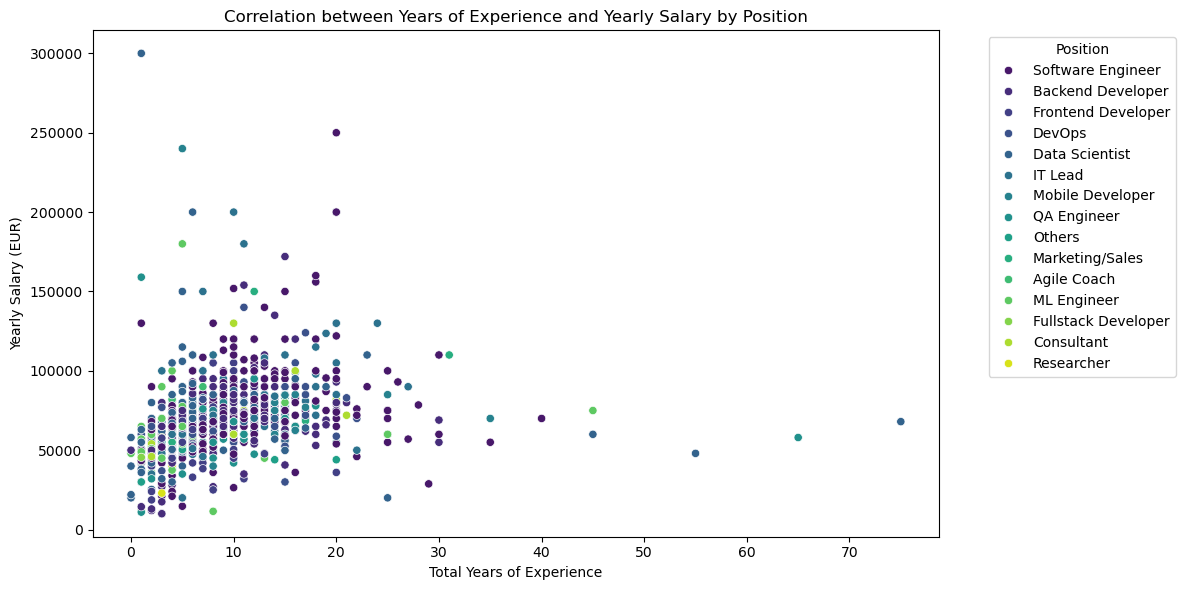

In [13]:
# Filter data to exclude salaries above 300K for better visibility
df_filtered = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] <= 300000]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='Total years of experience',
    y='Yearly brutto salary (without bonus and stocks) in EUR',
    hue='Position ',
    palette='viridis'
)
plt.title('Correlation between Years of Experience and Yearly Salary by Position')
plt.xlabel('Total Years of Experience')
plt.ylabel('Yearly Salary (EUR)')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


What is the mean of total years of experience per seniority level?

In [14]:
# See unique values in the seniority level
df['Seniority level'].unique()


array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'No level '], dtype=object)

In [15]:
# remove "No Level" and "No Level " and fill it with nan
df['Seniority level'] = df['Seniority level'].str.strip()
df['Seniority level'] = df['Seniority level'].replace('No level', np.nan)

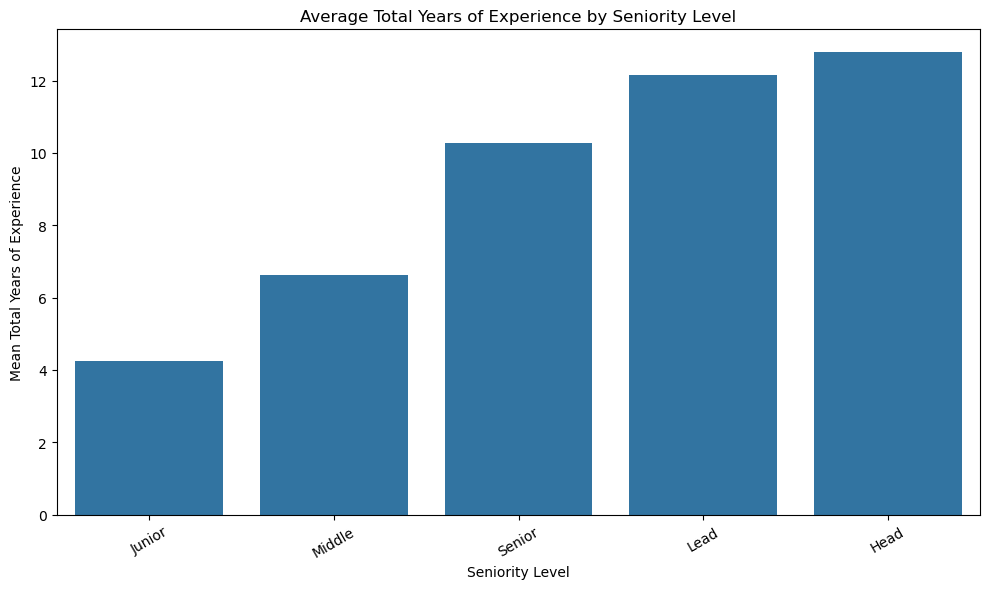

In [16]:
mean_experience = df.groupby('Seniority level')['Total years of experience'].mean().reset_index()
mean_experience = mean_experience.sort_values(by='Total years of experience')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_experience,
    x='Seniority level',
    y='Total years of experience'
    )
plt.title('Average Total Years of Experience by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Mean Total Years of Experience')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [18]:
# Create a new DataFrame with only the specified columns
df_selected = df[['Seniority level', 'Yearly brutto salary (without bonus and stocks) in EUR']]

# Function to calculate outliers for a given group
def count_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((group < lower_bound) | (group > upper_bound)).sum()

# Group by 'Seniority level' and calculate outliers
outliers = df_selected.groupby('Seniority level')['Yearly brutto salary (without bonus and stocks) in EUR'].apply(count_outliers)

# Display the results
print("Number of outliers in yearly brutto salary by seniority level:")
print(outliers)

Number of outliers in yearly brutto salary by seniority level:
Seniority level
Head       7
Junior     9
Lead      10
Middle    25
Senior    41
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: int64


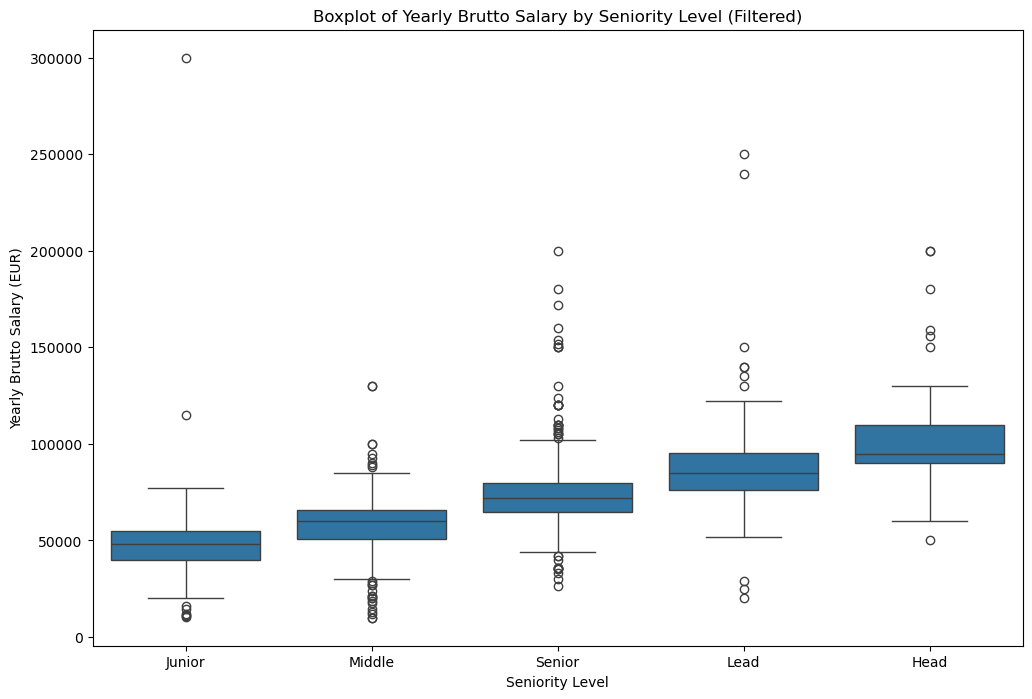

In [19]:
# Create a new DataFrame with only the specified columns
df_selected = df[['Seniority level', 'Yearly brutto salary (without bonus and stocks) in EUR']]

# Define the threshold for all seniority levels -> otherwise the boxplot is not
threshold = 300000

# Filter out the extreme outliers for all seniority levels
df_filtered = df_selected[df_selected['Yearly brutto salary (without bonus and stocks) in EUR'] <= threshold]

# Sort the seniority levels by the median salary in ascending order
sorted_seniority_levels = df_filtered.groupby('Seniority level')['Yearly brutto salary (without bonus and stocks) in EUR'].median().sort_values().index

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(
    data=df_filtered, 
    x='Seniority level', 
    y='Yearly brutto salary (without bonus and stocks) in EUR',
    order=sorted_seniority_levels
)

# Adding title and labels
plt.title('Boxplot of Yearly Brutto Salary by Seniority Level (Filtered)')
plt.xlabel('Seniority Level')
plt.ylabel('Yearly Brutto Salary (EUR)')

# Show plot
plt.show()